<a href="https://colab.research.google.com/github/s-vrla/portfolio/blob/main/insurance_costs_pandas_showcase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About The Dataset
`insurance.csv` is an instructory dataset from Codecademy regarding insurance rates. Each row represents 1 person and includes the following information:  
  *  `age`: how old the person is
  *  `sex`: the assigned sex at birth of the person
  *  `bmi`: the body mass index of the person
  *  `children`:  the number of children the person has
  *  `smoker`:  whether the person smokes or not
  *  `region`:  what geographic region the person resides in
  *  `charges`:  the annual medical insurance cost for the person  

The dataset is limited to residents of the United States who are 18 or over.



# Notebook Conclusions
The supporting code and analysis for each of these conclusions is in the notebook below.

## Dataset Overview
1. For numerical variables, there is potentially some correlation:
  *  `charges` and `age`
  *  `charges` and `bmi`
2. There is one row that may be duplicated. It has a negligible effect, but will be dropped as part of cleaning/transforming.
3. There are no null values, rows, or columns.
3. The `age` histogram indicates some potential skew towards people under 20.

## Transformations
1.  1 duplicated row dropped from the dataset
2.  Added columns:
  *  `has_children`:  boolean column with False indicating no children and True indicating 1 or more children
  *  `age_group`: age groups based on decade ranges
3.  Change `object` columns to `category`

## Variable Relationships
1. There is a correlation between smoking and higher insurance charges.

# Set Up
The following items are set up for the remainder of the notebook.

In [ ]:
## Authorize Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## Library imports

In [ ]:
#general analysis
import pandas as pd
import pprint as pp
import re
import numpy as np
import seaborn as sns

#file management
from pathlib import Path
from datetime import datetime

#stop words counter
#from collections import Counter

In [ ]:

#unique marker for new files
today = datetime.now().strftime("%Y-%m-%d")

## Display Preferences

In [ ]:
#current preferences
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_colwidth', None) #change column display width
#pd.set_option('display.precision', 2) #displays 2 decimal places on all numbers
pd.set_option('display.float_format',  '{:.3f}'.format)
pd.set_option('display.memory_usage', 'deep')

# File Handling

In [ ]:
# @title File Selection
# @markdown 1. Navigate to original file location in sidebar
# @markdown 2. right-click 'Copy path'
# @markdown 3. Paste into 'file_path' field

file_path = '/content/drive/MyDrive/data_analysis/codecademy/insurance_costs/insurance.csv'  # @param {type: "string"}

# @markdown ---

In [ ]:
#set up file_path
file_path = Path(file_path)

In [ ]:
file_path

PosixPath('/content/drive/MyDrive/data_analysis/codecademy/insurance_costs/insurance.csv')

In [ ]:
#select main drive path
main_drive = file_path.parent
print(main_drive)

#create output filename string using today for unique id
output_filename = f'{file_path.stem}_{today}'
print(output_filename)

/content/drive/MyDrive/data_analysis/codecademy/insurance_costs
insurance_2024-04-29


### Read into pandas dataframe

In [ ]:
df = pd.read_csv(file_path,
#                     usecols= keep_cols,
#                      sep='\t',
#                        nrows=100,
#                       engine='python',
#                     encoding='ISO-8859-1'
                        )

# DataFrame Overview

## Row and Column Count

In [ ]:
df.shape

(1338, 7)

## `.info()`
This shows that there are no null values in any of the columns.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 286.5 KB


## Head and Tail Rows
First and last 5 rows

In [ ]:
#first 5 rows
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.924
1,18,male,33.770,1,no,southeast,1725.552
2,28,male,33.000,3,no,southeast,4449.462
3,33,male,22.705,0,no,northwest,21984.471
4,32,male,28.880,0,no,northwest,3866.855


In [ ]:
#last 5 rows
df.tail(5)

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.970,3,no,northwest,10600.548
1334,18,female,31.920,0,no,northeast,2205.981
1335,18,female,36.850,0,no,southeast,1629.833
1336,21,female,25.800,0,no,southwest,2007.945
1337,61,female,29.070,0,yes,northwest,29141.360


## Descriptive Stats

In [ ]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000,1338,1338.000,1338.000,1338,1338,1338.000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207,NaN,30.663,1.095,NaN,NaN,13270.422
std,14.050,NaN,6.098,1.205,NaN,NaN,12110.011
min,18.000,NaN,15.960,0.000,NaN,NaN,1121.874
25%,27.000,NaN,26.296,0.000,NaN,NaN,4740.287
50%,39.000,NaN,30.400,1.000,NaN,NaN,9382.033
75%,51.000,NaN,34.694,2.000,NaN,NaN,16639.913


### `dataframe_info` function
This function and the following steps facilitate note-taking on the dataset by exporting the descriptive stats, column size, data type, and additional note-taking columns to .Xlsx format that can be used by Excel or Google Sheets.
*  Example output:  [insurance_rates_overview Google Sheet](https://docs.google.com/spreadsheets/d/16EuomU3krg_GO9FSQZhtq_w38YGzHAv-/edit#gid=458977586)

In [ ]:
#pandas documention re memory usage: base-2 representation; i.e. 1KB = 1024 bytes

In [ ]:
def get_dataframe_info(df):
    """
Recreates column-wise info from df.info() as a DataFrame, in preparation for saving to csv or xlsx
    """
    df_dtypes = pd.DataFrame(df.dtypes, columns=['Data Types'])

    df_memory_usage = df.memory_usage(index=False, deep=True).to_frame(name='Memory Use')
    df_memory_usage['Memory Use'] = df_memory_usage['Memory Use']/1024/1024

    df_percent_null = ((1 - df.count() / len(df)) * 100).to_frame(name='Percent Null')

    df_described = df.describe(include='all').T


    df_info = pd.concat([df_dtypes, df_memory_usage, df_percent_null, df_described], axis=1)

    # Reassign column names
    df_info = df_info.rename_axis('Column Names').round(2)

#    df_info = df_info.set_index('column_names')

    return df_info

In [ ]:
df_info = get_dataframe_info(df)

In [ ]:
(df_info.style
    .format(precision=2)
    .set_sticky(axis='index')
    .bar(color='#89d8e0')
)

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3851: RuntimeWarning: invalid value encountered in scalar divide
  end = (x - left) / (right - left)


,Data Types,Memory Use,Percent Null,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Column Names,,,,,,,,,,,,,,
age,int64,0.01,0.00,1338.00,nan,nan,nan,39.21,14.05,18.00,27.00,39.00,51.00,64.00
sex,object,0.08,0.00,1338,2,male,676,nan,nan,nan,nan,nan,nan,nan
bmi,float64,0.01,0.00,1338.00,nan,nan,nan,30.66,6.10,15.96,26.30,30.40,34.69,53.13
children,int64,0.01,0.00,1338.00,nan,nan,nan,1.09,1.21,0.00,0.00,1.00,2.00,5.00
smoker,object,0.08,0.00,1338,2,no,1064,nan,nan,nan,nan,nan,nan,nan
region,object,0.08,0.00,1338,4,southeast,364,nan,nan,nan,nan,nan,nan,nan
charges,float64,0.01,0.00,1338.00,nan,nan,nan,13270.42,12110.01,1121.87,4740.29,9382.03,16639.91,63770.43


### Descriptive Stats Summary
From these descriptive statistics, we know the following about our overall dataset:
  * Individuals range between 18 and 64, with the average age of 39 and a standard deviation of 14 years.
  * Insurance rates are between `$12110` and `$63770`, with an average of `$13270` and standard deviation of `$1121`.
  * BMI ranges between 15.96 and 53.13, with an average of 30.66 and a standard deviation of 6.10.

### Save overview output to `.xlsx` format

In [ ]:
#add a empty columns for note-taking in a spreadsheet
df_info.insert(loc=0,
               column='Notes',
               value = '')

df_info.insert(loc=1,
               column='Drop?',
               value = '')

df_info.insert(loc=2,
               column='Change Dtype?',
               value = '')

In [ ]:
#write to excel file
df_info.to_excel(main_drive / f"{output_filename}_ov.xlsx",
                 sheet_name=f'Overview {file_path.stem}',
                 freeze_panes=(1,4)
                 )

## Correlation Table
This indicates a positive correlation between `charges` and `bmi` and also  `charges` and `age`.

In [ ]:
df.corr(numeric_only=True).style.background_gradient()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


## Duplicated Rows
There is 1 duplicated row in the dataset. It has little effect on the dataset, but I will make a note and drop the duplicated row when exporting a cleaned dataset.

In [ ]:
df[df.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.590,0,no,northwest,1639.563
581,19,male,30.590,0,no,northwest,1639.563


### Compare removed duplicate dataset to original dataset

In [ ]:
df2 = df.drop_duplicates()

In [ ]:
df2.corr(numeric_only=True).style.background_gradient()

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


In [ ]:
#percent change between keeping or dropping duplicated row
(df.describe() - df2.describe()) / df.describe()

,age,bmi,children,charges
count,0.001,0.001,0.001,0.001
mean,-0.000,-0.000,-0.001,-0.001
std,0.000,-0.000,-0.000,-0.000
min,0.000,0.000,NaN,0.000
25%,0.000,0.000,NaN,-0.001
50%,0.000,0.000,0.000,-0.000
75%,0.000,-0.000,0.000,-0.001
max,0.000,0.000,0.000,0.000


## List of Column Names

In [ ]:
list(df.columns)

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

## Column Overview
This function loops over each column to produce the following info:
* name
* count of unique values
* datatype
* string to copy into a new cell, for displaying all value counts for a column

For value counts under the cutoff:
* a transposed display frame of all unique values

For value counts over the cutoff:
* transposed display frames of the top and bottom 10 values and counts


In [ ]:
def column_overview(df, columns, cutoff=100):
    """
    Display column name, count of unique values, and an easy to read dataframe of individual unique values and their counts

    Parameters
    ----------
    df: dataframe
    columns: list
    cutoff: int, maximum unique value count to display
    Recommend string or object columns with unclear or low expected unique values.

    Returns
    -------
    Prints out one result for each column in the provided list.
    """
    for col in columns:
        print("\n")
        print("Column name: " + col)
        num_unique = str(df[col].nunique())
        print(f"Number of Unique Values: {num_unique}")
        col_datatype = str(df[col].dtype)
        print(f"Column Datatype: {col_datatype}")
        print("\n")

        if int(num_unique) < cutoff:
          print("use line below for vertical results")
          print(f"pd.DataFrame(df['{col}'].value_counts(dropna=False))")
          display(pd.DataFrame(df[col].value_counts(dropna=False)).T)
          print(u'\u2500' * 80)
        else:
          print(f"more than {cutoff} results, showing Top 10 and Bottom 10")
          print("use line below for complete results")
          print(f"pd.DataFrame(df['{col}'].value_counts(dropna=False))")
          print("\n")
          print(f"Top 10 Unique Values of {col}")
          display(pd.DataFrame(df[col].value_counts(dropna=False).head(10)).T)
          print(f"Bottom 10 Unique Values of {col}")
          display(pd.DataFrame(df[col].value_counts(dropna=False).tail(10)).T)
          print(u'\u2500' * 80)


In [ ]:
column_overview(df, df.columns, 200)



Column name: age
Number of Unique Values: 47
Column Datatype: int64


use line below for vertical results
pd.DataFrame(df['age'].value_counts(dropna=False))


age,18,19,50,51,47,46,45,20,48,52,22,49,54,53,21,26,24,25,28,27,23,43,29,30,41,42,44,31,40,32,33,56,34,55,57,37,59,58,36,38,35,39,61,60,63,62,64
count,69,68,29,29,29,29,29,29,29,29,28,28,28,28,28,28,28,28,28,28,28,27,27,27,27,27,27,27,27,26,26,26,26,26,26,25,25,25,25,25,25,25,23,23,23,23,22


────────────────────────────────────────────────────────────────────────────────


Column name: sex
Number of Unique Values: 2
Column Datatype: object


use line below for vertical results
pd.DataFrame(df['sex'].value_counts(dropna=False))


sex,male,female
count,676,662


────────────────────────────────────────────────────────────────────────────────


Column name: bmi
Number of Unique Values: 548
Column Datatype: float64


more than 200 results, showing Top 10 and Bottom 10
use line below for complete results
pd.DataFrame(df['bmi'].value_counts(dropna=False))


Top 10 Unique Values of bmi


bmi,32.300,28.310,30.495,30.875,31.350,30.800,34.100,28.880,33.330,35.200
count,13,9,8,8,8,8,8,8,7,7


Bottom 10 Unique Values of bmi


bmi,40.480,38.900,47.410,35.435,46.700,46.200,23.800,44.770,32.120,30.970
count,1,1,1,1,1,1,1,1,1,1


────────────────────────────────────────────────────────────────────────────────


Column name: children
Number of Unique Values: 6
Column Datatype: int64


use line below for vertical results
pd.DataFrame(df['children'].value_counts(dropna=False))


children,0,1,2,3,4,5
count,574,324,240,157,25,18


────────────────────────────────────────────────────────────────────────────────


Column name: smoker
Number of Unique Values: 2
Column Datatype: object


use line below for vertical results
pd.DataFrame(df['smoker'].value_counts(dropna=False))


smoker,no,yes
count,1064,274


────────────────────────────────────────────────────────────────────────────────


Column name: region
Number of Unique Values: 4
Column Datatype: object


use line below for vertical results
pd.DataFrame(df['region'].value_counts(dropna=False))


region,southeast,southwest,northwest,northeast
count,364,325,325,324


────────────────────────────────────────────────────────────────────────────────


Column name: charges
Number of Unique Values: 1337
Column Datatype: float64


more than 200 results, showing Top 10 and Bottom 10
use line below for complete results
pd.DataFrame(df['charges'].value_counts(dropna=False))


Top 10 Unique Values of charges


charges,1639.563,16884.924,29330.983,2221.564,19798.055,13063.883,13555.005,44202.654,10422.917,7243.814
count,2,1,1,1,1,1,1,1,1,1


Bottom 10 Unique Values of charges


charges,4762.329,37079.372,5910.944,11454.022,12731.000,7345.084,26109.329,28287.898,1149.396,29141.360
count,1,1,1,1,1,1,1,1,1,1


────────────────────────────────────────────────────────────────────────────────


# Transformations

## Drop Duplicated Row

In [ ]:
df = df.drop_duplicates()
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges


## Add Columns

### `has_children`

In [ ]:
df['has_children'] = df['children'] != 0
df.head()

<ipython-input-30-76c6eb77cc11>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['has_children'] = df['children'] != 0


,age,sex,bmi,children,smoker,region,charges,has_children
0,19,female,27.900,0,yes,southwest,16884.924,False
1,18,male,33.770,1,no,southeast,1725.552,True
2,28,male,33.000,3,no,southeast,4449.462,True
3,33,male,22.705,0,no,northwest,21984.471,False
4,32,male,28.880,0,no,northwest,3866.855,False


### `age_group`

In [ ]:
#create bins by decade
label_names = ['Under 20', '20 to 29', '30 to 39', '40 to 49', '50 to 59', '60 to 69']
df['age_group'] = pd.cut(df['age'],
                             bins=range(9, 70, 10),
                             labels=label_names
                             )


# Change Column Data Types
This allows for categorical specific operations and reduces the memory usage of the dataframe.

In [ ]:
object_cols = list(df.select_dtypes('object').columns)
df[object_cols] = df[object_cols].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   age           1337 non-null   int64   
 1   sex           1337 non-null   category
 2   bmi           1337 non-null   float64 
 3   children      1337 non-null   int64   
 4   smoker        1337 non-null   category
 5   region        1337 non-null   category
 6   charges       1337 non-null   float64 
 7   has_children  1337 non-null   bool    
 8   age_group     1337 non-null   category
dtypes: bool(1), category(4), float64(2), int64(2)
memory usage: 60.2 KB


# Visualizations
By visualizing the data, we can begin to see how the variables affect one another.

##Numeric Variables
This pairplot gives a basic overview of numeric variables and their possible relationships to one another.


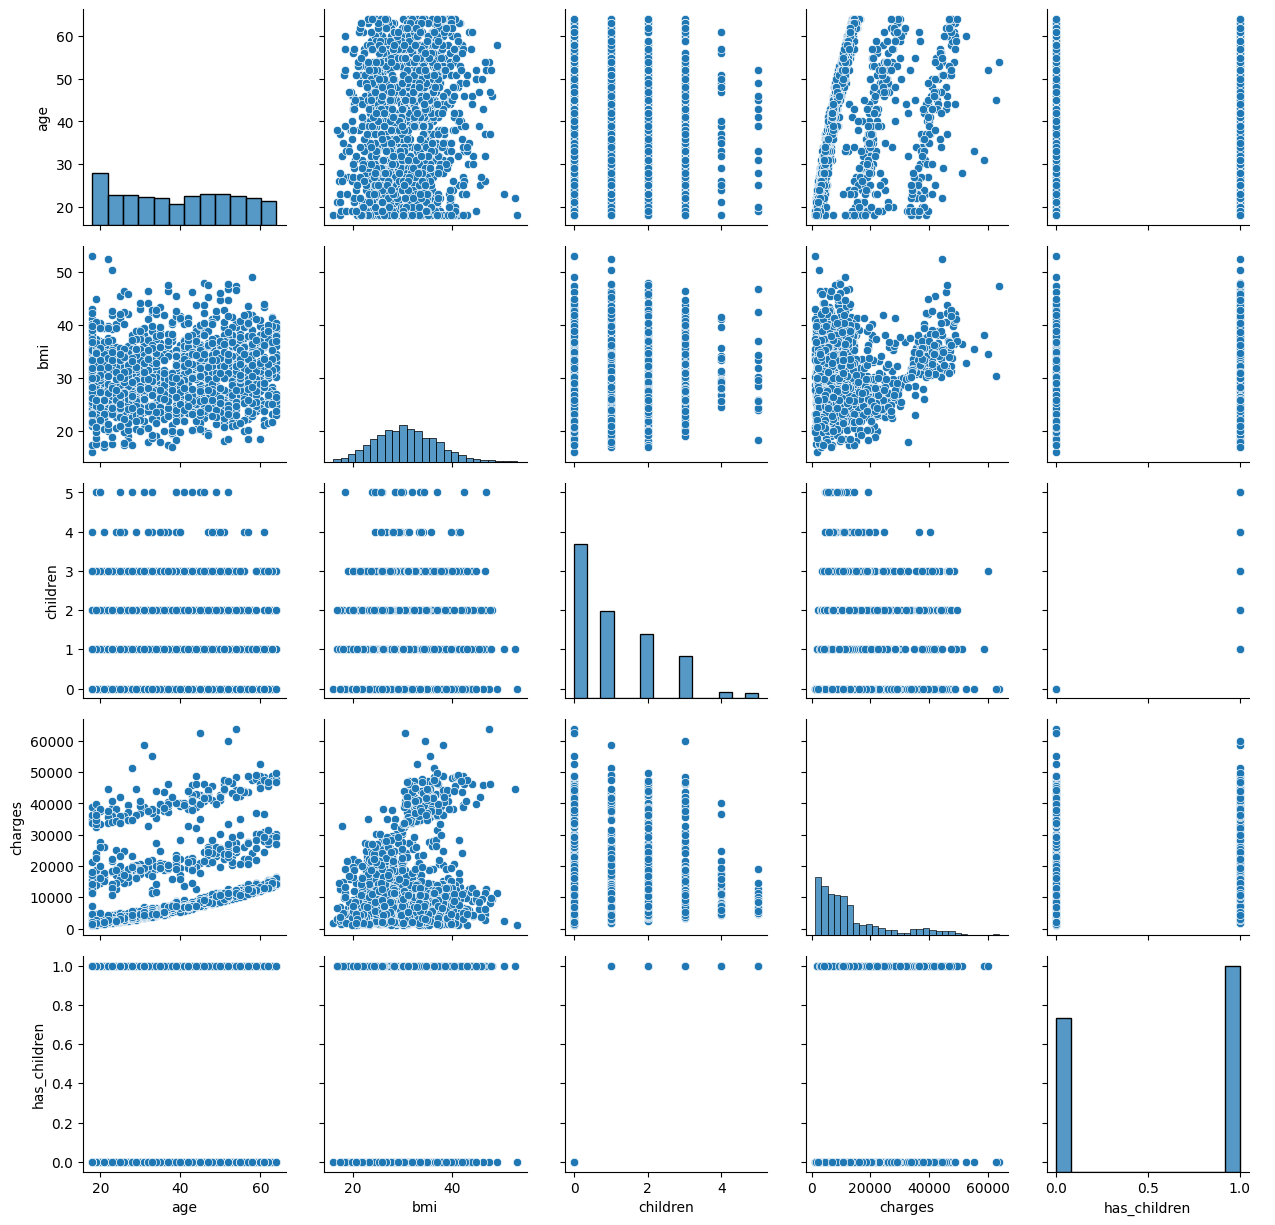

In [ ]:
g = sns.PairGrid(df)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

## Categorical Variables


In [ ]:
def create_boxplots(col):
  display(sns.catplot(df, x=col, y="charges", kind="box", hue=col))

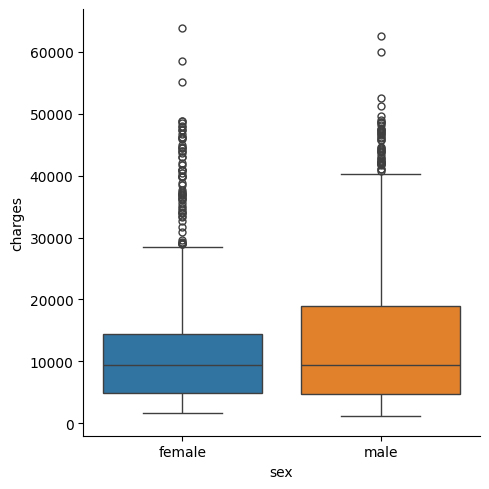

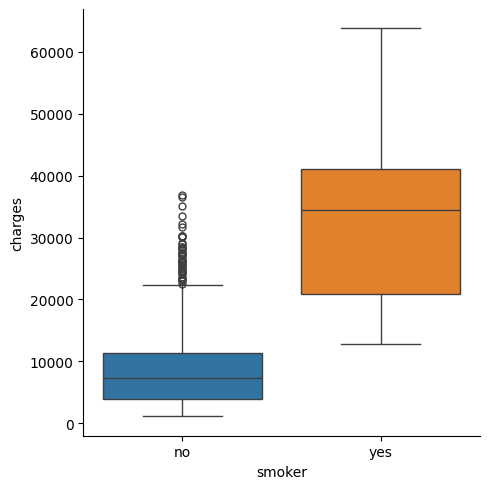

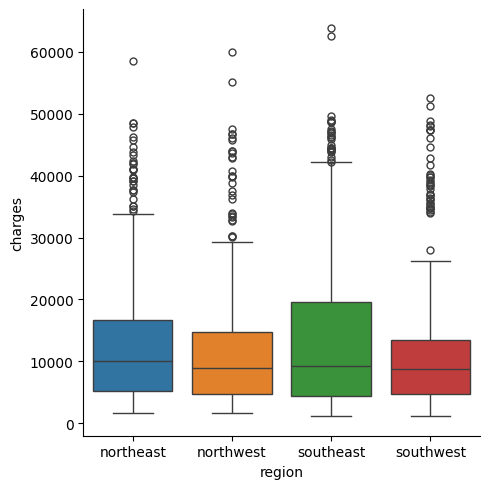

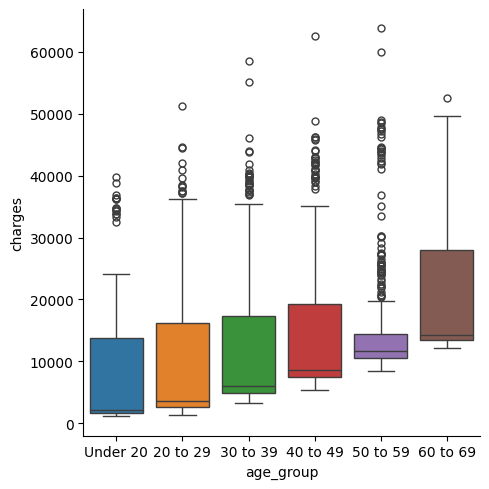

In [ ]:
for col in df.select_dtypes('category').columns:
  create_boxplots(col)

### Smoking Status
This looks to be an important variable as it relates to insurance charges.

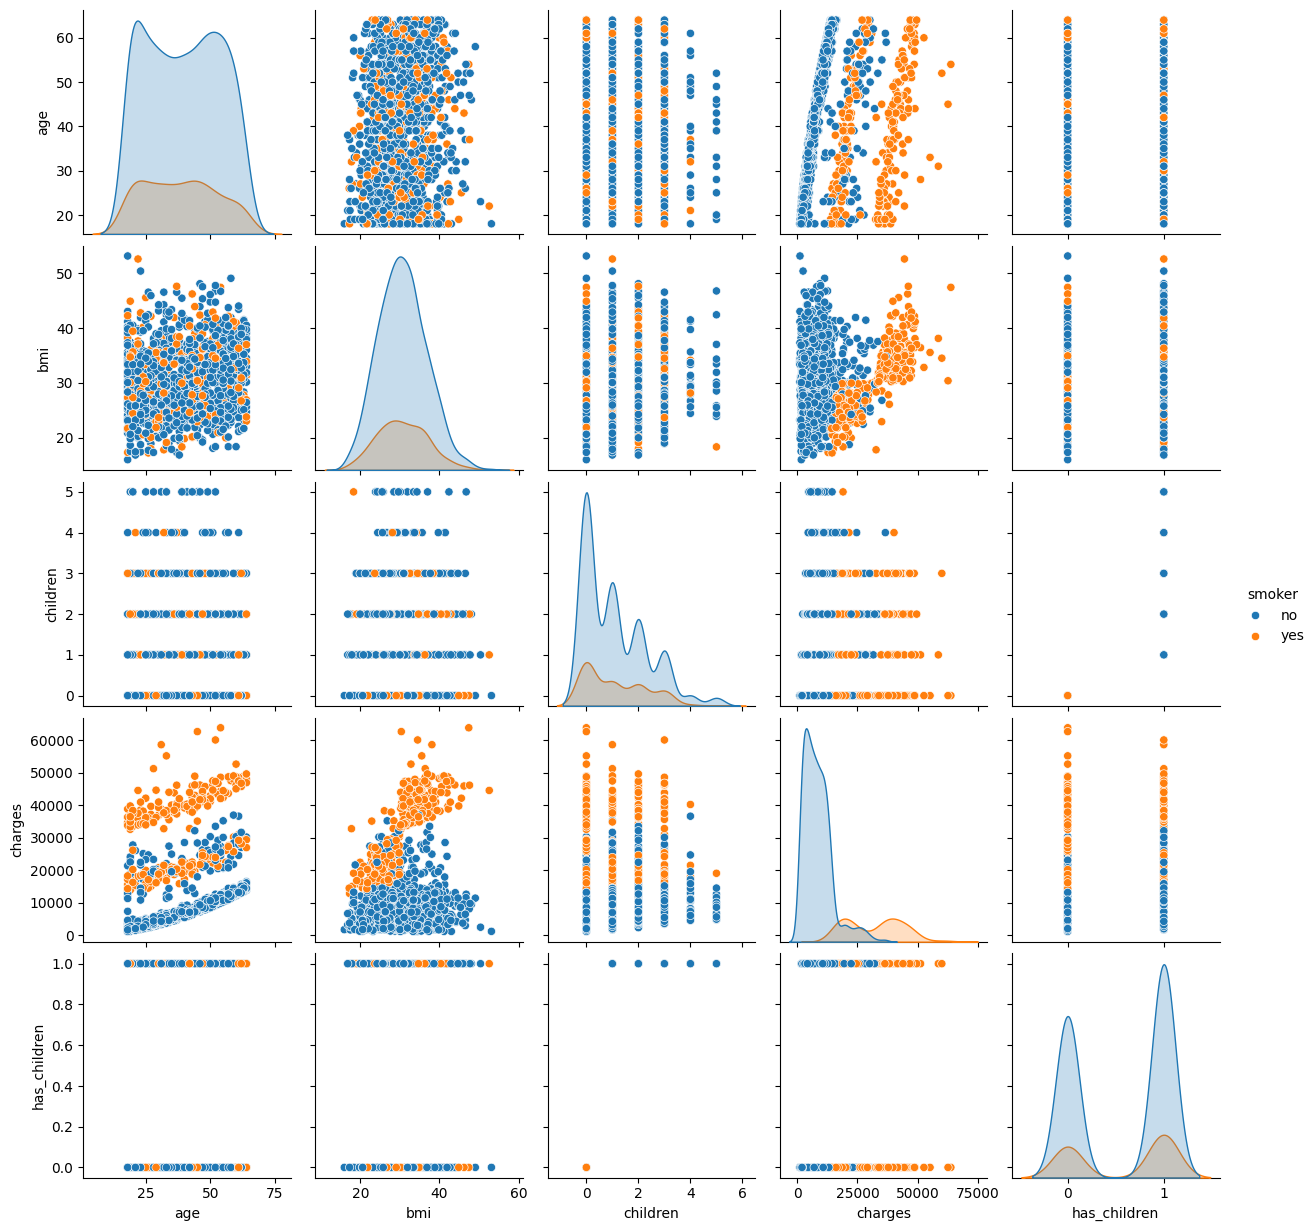

In [ ]:
sns.pairplot(df, hue='smoker')

# Scatterplot with Linear Regression
This plot indicates a clear difference in charges to smokers and non-smokers. Further analysis is required to determine how other factors impact the cost of insurance.

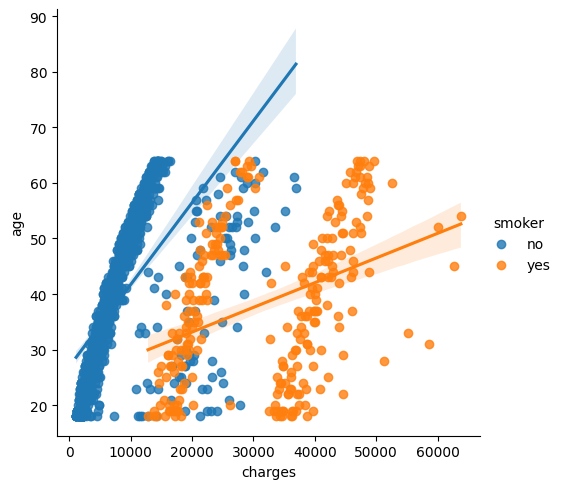

In [ ]:
sns.lmplot(data=df, x="charges", y="age", hue="smoker")

# Pivot Tables
We can also see the different in the descriptive statistics between different groups within categorical columns.

In [ ]:
#create 'heatmap' pivot tables of descriptive stats for each categorical column
for col in df.select_dtypes('category').columns.to_list():
  display(pd.pivot_table(df,
                  values=['charges'],
                  index=[col],
                  aggfunc='describe',
  ).style.background_gradient()
  )